In [26]:
import dynamiqs as dq
import jax
import jax.numpy as jnp  
from matplotlib import pyplot as plt

# jax and dq settings
jax.devices()
dq.set_device('cpu')
dq.set_precision('simple')

In [27]:
# parameters
na = 20  # number of Fock states for a
nb = 5  # number of Fock states for b
T = 4  # length of the simulation
omega = jnp.pi/T  # frequency of the oscillator
eps = -4 # coupling strength
Kb = 10 # kappa in the paper

In [28]:
# annihilation operators
a, b = dq.destroy(na, nb)

g2 = 1 # coupling strength

H = g2 * dq.dag(a) @ dq.dag(a) @ b  + jnp.conj(g2) * a @ a @ dq.dag(b) + jnp.conj(eps) * b + eps * dq.dag(b)# Hamiltonian

|██████████| 100.0% ◆ elapsed 265.88ms ◆ remaining 0.00ms  
100%|██████████| 50/50 [00:02<00:00, 23.32it/s]


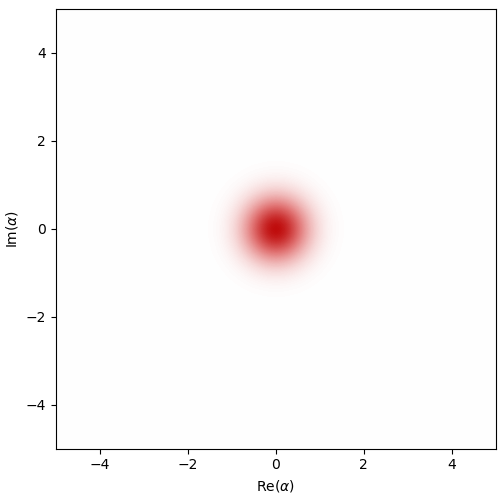

In [29]:
# initial state
psi0 = dq.fock((na,nb), (0,0))  # vacuum state
t_save = jnp.linspace(0, T, 50)  # time points to save the state

jump_ops = [jnp.sqrt(Kb)*b] # jump operators
exp_ops = [dq.dag(a) @ a] # expectation operators
res = dq.mesolve(H,jump_ops, psi0, t_save, exp_ops=exp_ops) # solve the master equation

trace_a = dq.ptrace(res.states, 0,res.states.dims) # partial trace over b

dq.plot.wigner_gif(trace_a, fps=120) # plot the Wigner function of the partial trace
